In [1]:
import torch
import torch.nn as nn


In [2]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("./1d.txt")

In [5]:
df.head

<bound method NDFrame.head of     Unnamed: 0     r1        v
0            0   0.61  0.38658
1            1   0.71  0.24077
2            2   0.81  0.14686
3            3   0.91  0.08596
4            4   1.01  0.04686
..         ...    ...      ...
95          95  10.11  0.17449
96          96  10.21  0.17449
97          97  10.31  0.17449
98          98  10.41  0.17449
99          99  10.51  0.17449

[100 rows x 3 columns]>

In [6]:
X = df[["r1"]]
y = df[['v']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [7]:
X

,r1
0,0.61
1,0.71
2,0.81
3,0.91
4,1.01
...,...
95,10.11
96,10.21
97,10.31
98,10.41


In [8]:
y

,v
0,0.38658
1,0.24077
2,0.14686
3,0.08596
4,0.04686
...,...
95,0.17449
96,0.17449
97,0.17449
98,0.17449


# Standardization

In [9]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler_y = preprocessing.StandardScaler()
scaler_y.fit(y_train)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

y_train = scaler_y.transform(y_train)
y_test = scaler_y.transform(y_test)

In [43]:
from sklearn.linear_model import Lasso, LinearRegression, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.isotonic import isotonic_regression

multiple_linear_regression = isotonic_regression()
multiple_linear_regression.fit(X = X_train, y = y_train)

TypeError: isotonic_regression() missing 1 required positional argument: 'y'

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred_train = multiple_linear_regression.predict(X_train)
y_pred = multiple_linear_regression.predict(X_test)
train_mse = np.sqrt(mean_squared_error(y_train,y_pred_train))
rmse_MLR = np.sqrt(mean_squared_error(y_test,y_pred))

r2 =  r2_score(y_test, y_pred)

print(r2)
print(train_mse)
print(rmse_MLR)

0.9998318089666635
0.0006161842043454477
0.018386893782304594


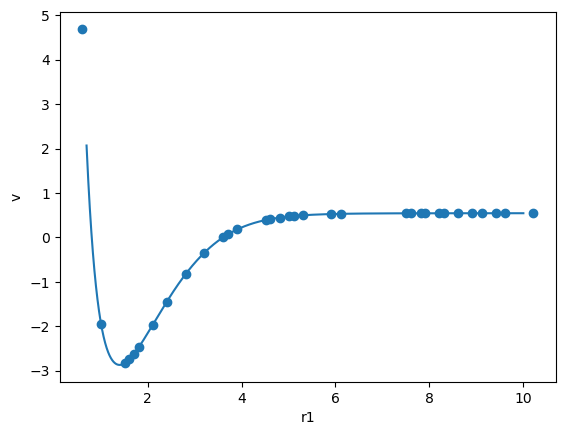

In [42]:
N = 2000
r1 = np.linspace(0.7,10,N)
v = multiple_linear_regression.predict(r1.reshape(-1,1))
plt.plot(r1,v)
plt.scatter(X_test,y_test)
plt.xlabel("r1")
plt.ylabel("v")
plt.show()